In [1]:
#Cargamos las librerias iniciales que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [2]:
#Vamos a hacer algunos analisis de los Dataset de zona norte y zona sur por separado comparando los resultados luego de 
#someterlos a los mismos analisis
#Cargamos el Dataset de zona norte 
dfn=pd.read_excel("DFzonasur.xlsx")
dfn.head(20)


,Unnamed: 0,Cultivo,anio,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,Precipitacion
0,1,101,1988,14,3000,3000,2250,750,243.6
1,2,101,1989,14,2000,2000,2400,1200,333.3
2,3,101,1990,14,1800,1700,1700,1000,277.8
3,4,101,1991,14,1000,1000,950,950,263.4
4,5,101,1992,14,2000,2000,2200,1100,343.4
5,6,101,1993,14,1500,1500,1700,1133,253.8
6,7,101,1994,14,800,800,900,1125,279.1
7,8,101,1995,14,800,800,960,1200,282.9
8,9,101,1996,14,500,500,500,1000,237.4
9,10,101,1997,14,1200,1200,1680,1400,377.8


In [3]:
#hacemos una busqueda de asimetrias de las variables mediante el metodo skew
skew=dfn.skew().abs().sort_values()
skew

Unnamed: 0        0.004058
Cultivo           0.038466
anio              0.131230
idDepartamento    0.503257
Precipitacion     0.617863
Rendimiento       1.208054
Sup_Sembrada      2.642857
Sup_Cosechada     2.688630
Producción        3.116889
dtype: float64

In [4]:
dfn = dfn.drop("Producción", axis=1)
dfn

,Unnamed: 0,Cultivo,anio,idDepartamento,Sup_Sembrada,Sup_Cosechada,Rendimiento,Precipitacion
0,1,101,1988,14,3000,3000,750,243.6
1,2,101,1989,14,2000,2000,1200,333.3
2,3,101,1990,14,1800,1700,1000,277.8
3,4,101,1991,14,1000,1000,950,263.4
4,5,101,1992,14,2000,2000,1100,343.4
...,...,...,...,...,...,...,...,...
1925,1976,129,2017,833,105070,105070,4900,419.1
1926,1977,129,2018,833,89875,80875,4197,440.8
1927,1978,129,2019,833,119000,119000,3303,395.4
1928,1979,129,2020,833,131000,131000,4351,503.3


In [5]:
skew=dfn.skew().abs().sort_values()
skew

Unnamed: 0        0.004058
Cultivo           0.038466
anio              0.131230
idDepartamento    0.503257
Precipitacion     0.617863
Rendimiento       1.208054
Sup_Sembrada      2.642857
Sup_Cosechada     2.688630
dtype: float64

C:\Users\syluv\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sup_Sembrada', ylabel='Density'>

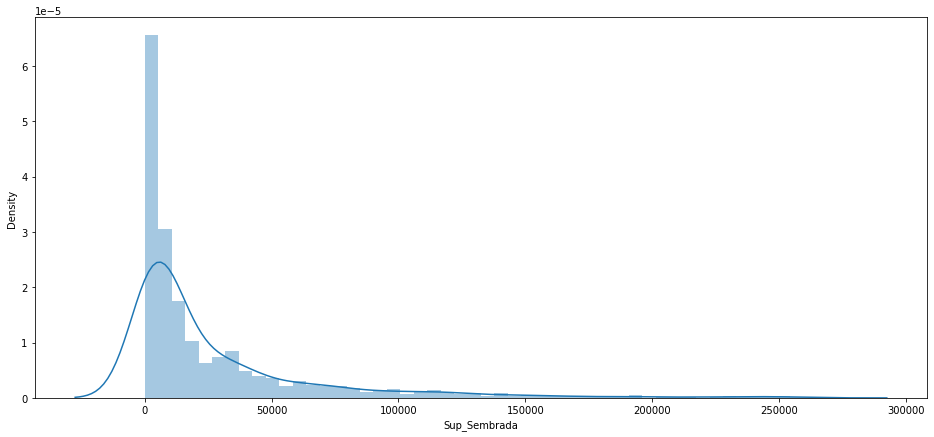

In [6]:
#Intentamos ver la distrubucion de algunas columnas
fig, ax = plt.subplots(figsize=(16,7))
sns.distplot(dfn.iloc[:,4])

In [7]:
X = dfn.drop("Rendimiento", axis=1)
y=dfn.Rendimiento


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
model=DecisionTreeRegressor(random_state=1)

In [12]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [13]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [14]:
y_preds=model.predict(X_test)

In [15]:
comp=pd.DataFrame({"real": y_test, "preds":y_preds})

In [16]:
comp.head(30)

,real,preds
48,947,1000.0
1406,479,408.0
1800,2409,2394.0
943,4000,3000.0
309,2000,2100.0
634,4300,3700.0
385,2300,2842.0
863,2000,1900.0
1427,1324,1000.0
1773,2220,2470.0


In [17]:
from sklearn.metrics import accuracy_score


In [18]:
acc= accuracy_score(y_test, y_preds)
acc

0.1226252158894646

In [19]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test,y_preds, squared = False)
rmse

693.46925398147

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
import warnings
warnings.filterwarnings('once')

Valor óptimo de n_estimators: 136


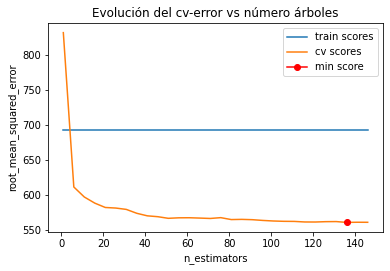

In [21]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 1.0,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(y_test,y_preds, squared = False)
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

In [22]:
model2 = RandomForestRegressor(
            n_estimators = 146,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 1.0,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
model2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=146, n_jobs=-1, random_state=123)

In [23]:
y_preds2=model2.predict(X_test)


In [24]:
comp2=pd.DataFrame({"real": y_test, "preds":y_preds2})
comp2

,real,preds
48,947,974.267123
1406,479,642.376712
1800,2409,2294.849315
943,4000,3626.746575
309,2000,2153.404110
...,...,...
1068,5800,5796.917808
142,1500,1397.972603
1834,2363,2687.335616
816,1696,1612.842466


In [25]:
rmse = mean_squared_error(y_test,y_preds2, squared = False)
rmse

535.2982348263141

Valor óptimo de max_features: 4


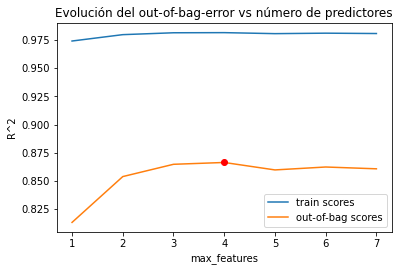

In [26]:
#Intentamos ver el valor optimo de features para mejorar nuestro modelo
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 146,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

In [27]:
#Aplicamos los cambios
model3 = RandomForestRegressor(
            n_estimators = 140,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 0.6,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
model3.fit(X_train, y_train)

RandomForestRegressor(max_features=0.6, n_estimators=140, n_jobs=-1,
                      random_state=123)

In [28]:
y_preds3=model3.predict(X_test)

In [29]:
rmse = mean_squared_error(y_test,y_preds3, squared = False)
rmse

528.4388749537691

Valor óptimo de max_features: 3


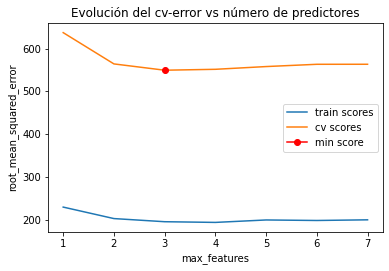

In [30]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

In [31]:
#Grid Search basado en out-of-bag error
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [3],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

Modelo: {'max_depth': None, 'max_features': 3, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 3, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 3, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 3, 'n_estimators': 150} ✓


,oob_r2,max_depth,max_features,n_estimators
0,0.863940,NaN,3.0,150.0
3,0.863692,20.0,3.0,150.0
2,0.854087,10.0,3.0,150.0
1,0.506459,3.0,3.0,150.0


In [32]:
#Grid Search basado en validación cruzada
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [50,100,150],
              'max_features': [3, 4, 5],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
27,20,3,50,-536.207426,41.254272,-209.802068,5.030970
0,None,3,50,-536.352062,43.870280,-208.873167,4.873177
28,20,3,100,-537.703932,41.994741,-205.351198,3.797926
29,20,3,150,-538.206805,42.162862,-204.441760,3.867523
1,None,3,100,-539.202128,42.231828,-204.732374,3.938175
2,None,3,150,-539.220927,42.442577,-203.803703,4.204835
35,20,5,150,-542.520516,48.536624,-205.161800,5.432826
32,20,4,150,-542.776863,47.126748,-204.654325,5.791411
8,None,5,150,-543.015486,47.488196,-205.150724,5.349008
5,None,4,150,-543.228522,48.655994,-204.351364,6.156333


In [33]:
modelo_final = grid.best_estimator_
predicciones = modelo.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 526.4394063683781


In [34]:
comp3=pd.DataFrame({"real": y_test, "preds":y_preds})
comp3.sample(50)

,real,preds
767,1400,1000.0
1008,2000,1100.0
1880,3285,2891.0
421,2500,2500.0
812,1520,1700.0
1415,1300,1300.0
925,3500,5000.0
1273,1711,1200.0
408,2306,2200.0
1290,2000,2100.0
